Grover Algorithm implementation

In [271]:
from qiskit import QuantumCircuit , QuantumRegister , ClassicalRegister
from qiskit.providers.basic_provider import BasicProvider
from qiskit import transpile
from qiskit.circuit.library import UnitaryGate
import numpy as np
import random
import math
#from qiskit_ibm_runtime import QiskitRuntimeService

In [272]:
def combine(n):
    # Make diccionary
    combine = {}
    # Generar todas las combinaciones posibles de n bits
    for i in range(2**n):
        # Convertir el número a binario y rellenar con ceros a la izquierda
        combinacion_binaria = format(i, f'0{n}b')
        # Almacenar la combinación en el diccionario
        combine[i] = combinacion_binaria

    return combine

My implementation

In [273]:

n = 2
combinaciones = combine(n+1)
x0 = combinaciones.get(0)[:-1]
matrix = np.zeros((2 * 2 ** n, 2 * 2 ** n), dtype=complex)
for i in range(2 * 2 ** n):
    for j in range(2 * 2 ** n):
        x  = combinaciones.get(i)
        x1 = combinaciones.get(j)
        if  x[:-1] == x0:
            fx = 1
        else:
            fx = 0
        yfx = int(x[-1]) ^ fx
        if x[:-1] == x1[:-1] and yfx == int(x1[-1]):
            matrix[i][j] = 1
        else:
            matrix[i][j] = 0

print(matrix)

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [274]:
def uf(n, qc, target):
    combinaciones = combine(n+1)
    #x0 = random.choice(combinaciones)[:-1] Random version
    x0 = target
    matrix = np.zeros((2 * 2 ** n, 2 * 2 ** n), dtype=complex)
    for i in range(2 * 2 ** n):
        for j in range(2 * 2 ** n):
            x  = combinaciones.get(i)
            x1 = combinaciones.get(j)
            if  x[:-1] == x0:
                fx = 1
            else:
                fx = 0
            yfx = int(x[-1]) ^ fx
            if x[:-1] == x1[:-1] and yfx == int(x1[-1]):
                matrix[i][j] = 1
            else:
                matrix[i][j] = 0
    gate = UnitaryGate(matrix, label="Uf")
    qc.append(gate, qc.qubits)
    qc.barrier()
    return qc


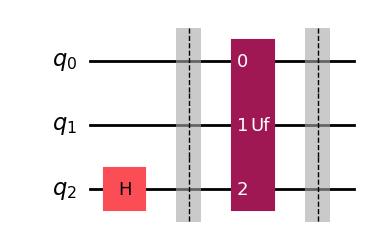

In [275]:
def PhaseInvertion(n, qc, oracle, target):
    qc.h(n)
    qc.barrier()
    inst = oracle(n, QuantumCircuit(n + 1, name='Uf'), target).to_instruction()
    #uf = [i for i in range(0, n + 1)]
    qc.append(inst, qc.qubits)
    qc.barrier()
    return qc

n = 2
PhaseInvertion(n, QuantumCircuit(n + 1), uf, '00').draw(output='mpl')

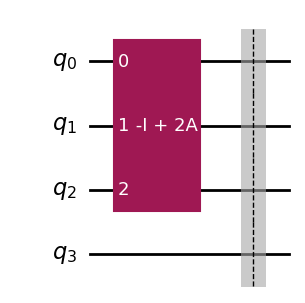

In [289]:
def Amplification(n, qc):
    number = 2/(2**n)
    IA2 = np.full((2 ** n, 2 ** n), number)
    for i in range(2 ** n):
        IA2[i, i] -= 1
    gate = UnitaryGate(IA2, label=" -I + 2A")
    qc.append(gate, qc.qubits[:n])
    qc.barrier()
    #combine = qc.compose(gate, qc.qubits[:n])
    #combine.barrier()
    return qc #combine

n = 3
Amplification(n, QuantumCircuit(n + 1)).draw(output='mpl')


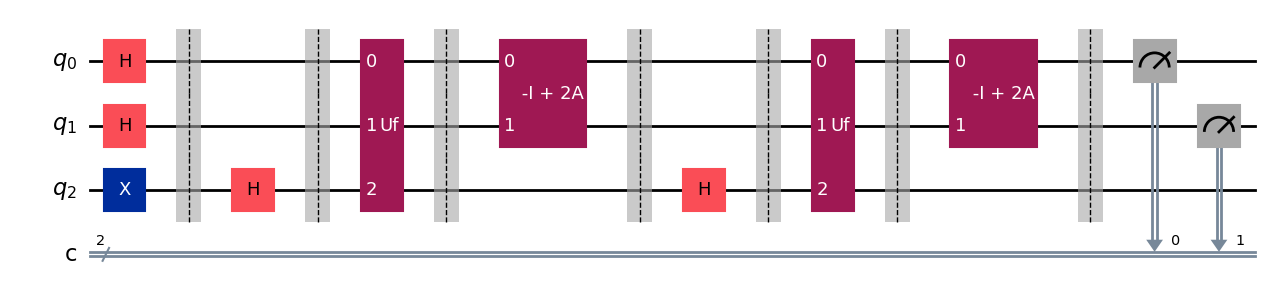

In [294]:
def Grover(n, target):
    qc = QuantumCircuit(n + 1, n)
    [qc.h(i) for i in range(n)]
    qc.x(n)
    qc.barrier()

    loop = math.ceil(math.sqrt(2 ** n))
    for i in range(loop):
        qc = PhaseInvertion(n, qc, uf, target)
        qc = Amplification(n, qc)
        
    qc.measure(range(n), range(n))
    return qc

Grover(2, '00').draw(output='mpl')

ZUZENDU EGIN BEHAR DA AZKEN QUBITS!!!!!!

In [293]:
backend = BasicProvider().get_backend("basic_simulator")
#n =int(input("Add num of quantum:"))
n = 2
target = '00'
circuit = Grover(n, target)
circuit.draw(output='mpl')
new_circuit = transpile(circuit, backend = backend)
job = backend.run(new_circuit, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 259, '01': 261, '10': 264, '11': 240}
